In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from simple_nlp_library import preprocessing, embeddings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load the data
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
# previewing the first rows of the real news 
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
# previewing the last rows of the real news dataset
real.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
# previewing the first rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
# previewing the last rows of the fake news dataset
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [7]:
# Getting information about the real news dataset
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
# Getting information about the fake news dataset
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
# Combine real and fake news titles and labels
X = real["title"].tolist() + fake["title"].tolist()
y = [0] * len(real) + [1] * len(fake)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Text preprocessing and vectorization
stop_words = preprocessing.stop_words()
vectors = embeddings.vectors()


In [12]:
# Vectorize the training and testing data
vectorizer = CountVectorizer(stop_words=stop_words)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# MLPClassifier

In [13]:
# MLPClassifier model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=100)
mlp.fit(X_train_vec, y_train)


MLPClassifier(random_state=100)

In [14]:
y_pred_train = mlp.predict(X_train_vec)
y_pred_test = mlp.predict(X_test_vec)

In [15]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [16]:
categories = ['real', 'fake']
print(f'Train accuracy - {train_accuracy}\nTest accuracy - {test_accuracy}')

Train accuracy - 0.9999721588061696
Test accuracy - 0.944097995545657


In [18]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=categories, digits=4))

Training Classification Report:
              precision    recall  f1-score   support

        real     1.0000    0.9999    1.0000     17087
        fake     0.9999    1.0000    1.0000     18831

    accuracy                         1.0000     35918
   macro avg     1.0000    1.0000    1.0000     35918
weighted avg     1.0000    1.0000    1.0000     35918



In [19]:
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=categories, digits=4))

Testing Classification Report:
              precision    recall  f1-score   support

        real     0.9508    0.9323    0.9415      4330
        fake     0.9381    0.9551    0.9465      4650

    accuracy                         0.9441      8980
   macro avg     0.9444    0.9437    0.9440      8980
weighted avg     0.9442    0.9441    0.9441      8980



In [20]:
x = ['Train Accuracy', 'Test Accuracy']
y = [train_accuracy, test_accuracy]

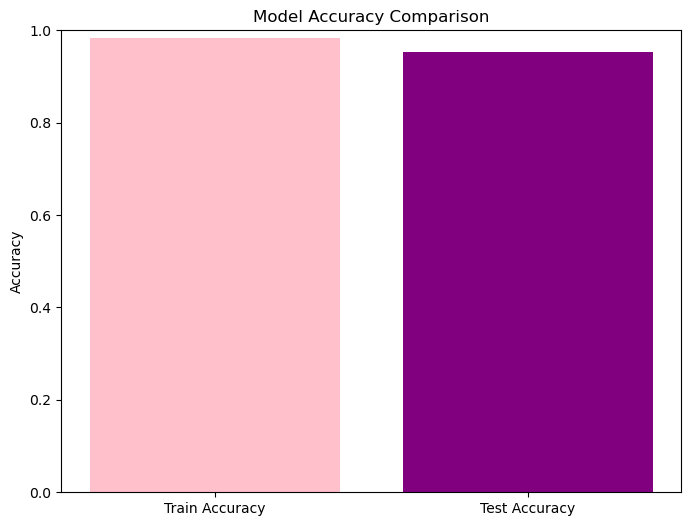

In [49]:
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['pink', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy values
plt.show()

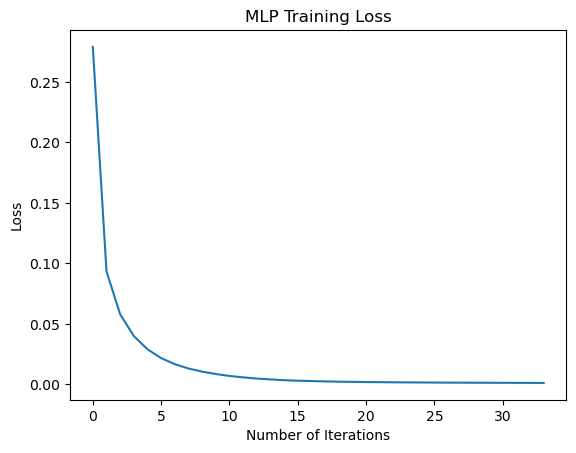

In [22]:
# Plot the MLP training loss
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

# DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=100)
dt_classifier.fit(X_train_vec, y_train)


DecisionTreeClassifier(random_state=100)

In [24]:
# Make predictions on the training and testing data
y_pred_train = dt_classifier.predict(X_train_vec)
y_pred_test = dt_classifier.predict(X_test_vec)

In [25]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [26]:
categories = ['real', 'fake']
print(f'Train accuracy - {train_accuracy}\nTest accuracy - {test_accuracy}')

Train accuracy - 1.0
Test accuracy - 0.9155902004454343


In [27]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=categories, digits=4))

Training Classification Report:
              precision    recall  f1-score   support

        real     1.0000    1.0000    1.0000     17087
        fake     1.0000    1.0000    1.0000     18831

    accuracy                         1.0000     35918
   macro avg     1.0000    1.0000    1.0000     35918
weighted avg     1.0000    1.0000    1.0000     35918



In [28]:
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=categories, digits=4))

Testing Classification Report:
              precision    recall  f1-score   support

        real     0.9194    0.9042    0.9117      4330
        fake     0.9121    0.9262    0.9191      4650

    accuracy                         0.9156      8980
   macro avg     0.9158    0.9152    0.9154      8980
weighted avg     0.9156    0.9156    0.9156      8980



In [29]:
x = ['Train Accuracy', 'Test Accuracy']
y = [train_accuracy, test_accuracy]

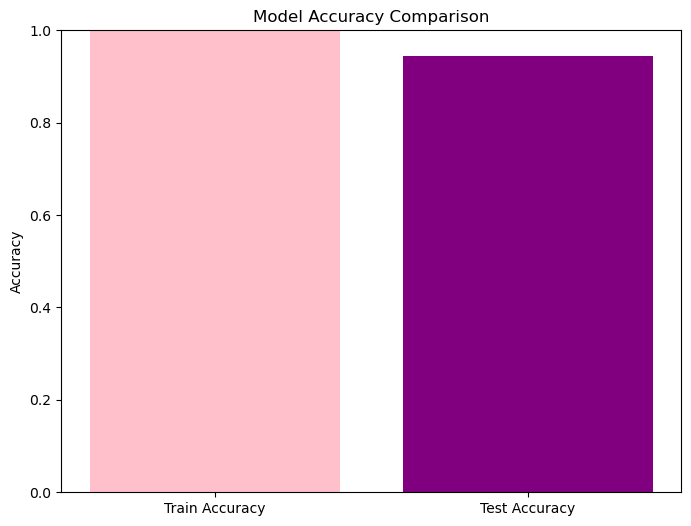

In [40]:
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['pink', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy values
plt.show()

# PassiveAggressiveClassifier

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier 
pac = PassiveAggressiveClassifier(random_state=100)
pac.fit(X_train_vec, y_train)

PassiveAggressiveClassifier(random_state=100)

In [32]:
y_pred_train = pac.predict(X_train_vec)
y_pred_test = pac.predict(X_test_vec)


In [33]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [34]:
categories = ['real', 'fake']
print(f'Train accuracy - {train_accuracy}\nTest accuracy - {test_accuracy}')

Train accuracy - 0.9997494292555265
Test accuracy - 0.9446547884187082


In [35]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=categories, digits=4))

Training Classification Report:
              precision    recall  f1-score   support

        real     0.9999    0.9996    0.9997     17087
        fake     0.9996    0.9999    0.9998     18831

    accuracy                         0.9997     35918
   macro avg     0.9998    0.9997    0.9997     35918
weighted avg     0.9997    0.9997    0.9997     35918



In [36]:
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=categories, digits=4))

Testing Classification Report:
              precision    recall  f1-score   support

        real     0.9481    0.9365    0.9423      4330
        fake     0.9415    0.9523    0.9469      4650

    accuracy                         0.9447      8980
   macro avg     0.9448    0.9444    0.9446      8980
weighted avg     0.9447    0.9447    0.9446      8980



In [37]:
x = ['Train Accuracy', 'Test Accuracy']
y = [train_accuracy, test_accuracy]

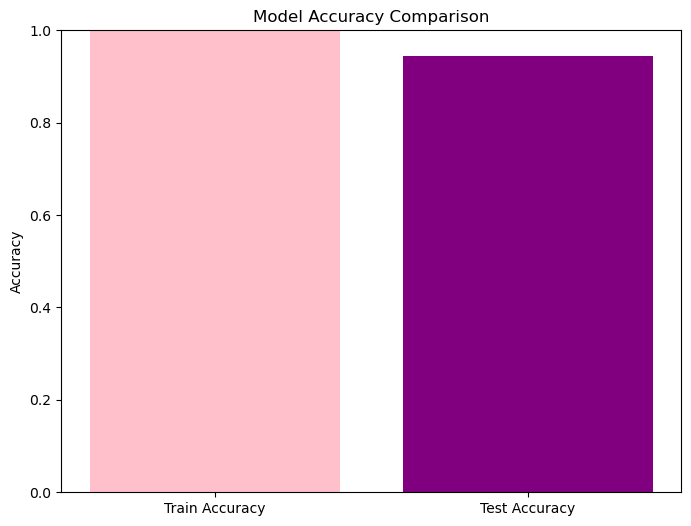

In [39]:
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['pink', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy values
plt.show()

# LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100)
logreg.fit(X_train_vec, y_train)

LogisticRegression(random_state=100)

In [42]:
# Predictions
y_pred_train = logreg.predict(X_train_vec)
y_pred_test = logreg.predict(X_test_vec)


In [43]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [44]:
categories = ['real', 'fake']
print(f'Train accuracy - {train_accuracy}\nTest accuracy - {test_accuracy}')

Train accuracy - 0.9830168717634612
Test accuracy - 0.9540089086859688


In [45]:
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train, target_names=categories, digits=4))

Training Classification Report:
              precision    recall  f1-score   support

        real     0.9786    0.9858    0.9822     17087
        fake     0.9871    0.9805    0.9837     18831

    accuracy                         0.9830     35918
   macro avg     0.9828    0.9831    0.9830     35918
weighted avg     0.9830    0.9830    0.9830     35918



In [46]:
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test, target_names=categories, digits=4))

Testing Classification Report:
              precision    recall  f1-score   support

        real     0.9460    0.9594    0.9526      4330
        fake     0.9616    0.9490    0.9553      4650

    accuracy                         0.9540      8980
   macro avg     0.9538    0.9542    0.9540      8980
weighted avg     0.9541    0.9540    0.9540      8980



In [47]:
x = ['Train Accuracy', 'Test Accuracy']
y = [train_accuracy, test_accuracy]

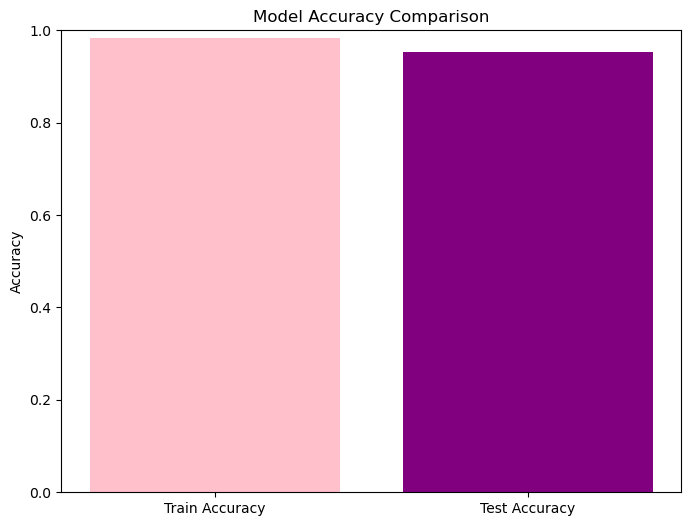

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['pink', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy values
plt.show()

# from the all classifiers are used for accurate detection

In [51]:
# Function to detect fake or real news from manual input
def detect_fake_or_real_news(input_title):
    input_vec = vectorizer.transform([input_title])
    prediction = mlp.predict(input_vec)
    prediction = dt_classifier.predict(input_vec)
    prediction = pac.predict(input_vec)
    prediction = logreg.predict(input_vec)
    if prediction[0] == 0:
        return "Real News"
    else:
        return "Fake News"

In [ ]:
#manual input example 1
input_title = input("Enter a news title to detect if it's fake or real: ")
result = detect_fake_or_real_news(input_title)
print("Prediction:", result)

In [48]:
#manual input example 2
input_title = input("Enter a news title to detect if it's fake or real: ")
result = detect_fake_or_real_news(input_title)
print("Prediction:", result)

Enter a news title to detect if it's fake or real: Jones certified U.S. Senate winner despite Moore challenge
Prediction: Real News
